In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
file_path = '../../../raw_data/6months/'
s_o = pd.read_csv(file_path+'0v2.csv')
s_d = pd.read_csv(file_path+'1v2.csv')
factors = pd.read_csv(file_path+'2v2.csv')

In [56]:
s_o.shape , s_d.shape , factors.shape

((807, 102), (808, 102), (4024, 102))

In [57]:
factors

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,timestamp
0,0,0.000028,0.000266,0.000171,0.000144,0.000172,0.000151,0.000312,5.681253e-05,0.000301,...,0.000035,0.000153,0.000117,0.000091,0.000269,0.000244,2.830117e-04,0.000181,0.000274,2023-01-02 00:00:00
1,1,0.000003,0.000404,0.000278,0.000402,0.000296,0.000032,0.000145,8.472997e-05,0.000142,...,0.000184,0.000200,0.000186,0.000236,0.000291,0.000044,4.199023e-04,0.000158,0.000252,2023-01-02 01:00:00
2,2,0.002216,0.002021,0.001780,0.000467,0.002065,0.001307,0.000653,1.412034e-03,0.002114,...,0.001547,0.001117,0.001859,0.000899,0.000350,0.001178,1.048546e-03,0.001538,0.000234,2023-01-02 02:00:00
3,3,0.000163,0.000058,0.000142,0.000092,0.000157,0.000146,0.000142,7.818571e-05,0.000040,...,0.000032,0.000018,0.000119,0.000086,0.000120,0.000158,4.055823e-05,0.000132,0.000126,2023-01-02 03:00:00
4,4,0.000013,0.000025,0.000023,0.000005,0.000014,0.000021,0.000024,7.287754e-06,0.000005,...,0.000027,0.000023,0.000016,0.000003,0.000035,0.000030,9.084110e-07,0.000025,0.000006,2023-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,4019,1.606423,1.598619,0.201607,0.837293,1.649324,1.587432,0.041362,6.789153e-01,0.935031,...,0.800744,1.178194,1.437789,1.281197,0.453426,0.021977,1.345605e+00,0.625601,1.394613,2023-06-18 20:00:00
4020,4020,0.641689,0.481637,0.699795,1.639870,0.099470,1.213435,1.711305,1.338809e-01,1.899150,...,1.231720,1.483738,0.007424,1.166740,1.707115,1.914011,1.443731e+00,0.216520,0.127003,2023-06-18 21:00:00
4021,4021,0.008120,0.007386,0.013528,0.012030,0.010012,0.008157,0.008154,8.842608e-04,0.008031,...,0.008746,0.010681,0.000802,0.010598,0.002189,0.017691,1.459789e-02,0.015195,0.012994,2023-06-18 22:00:00
4022,4022,0.003574,0.003894,0.004615,0.003352,0.001085,0.005019,0.003546,1.222659e-03,0.001877,...,0.002008,0.003648,0.003416,0.002180,0.004486,0.002712,1.280856e-03,0.000271,0.004809,2023-06-18 23:00:00


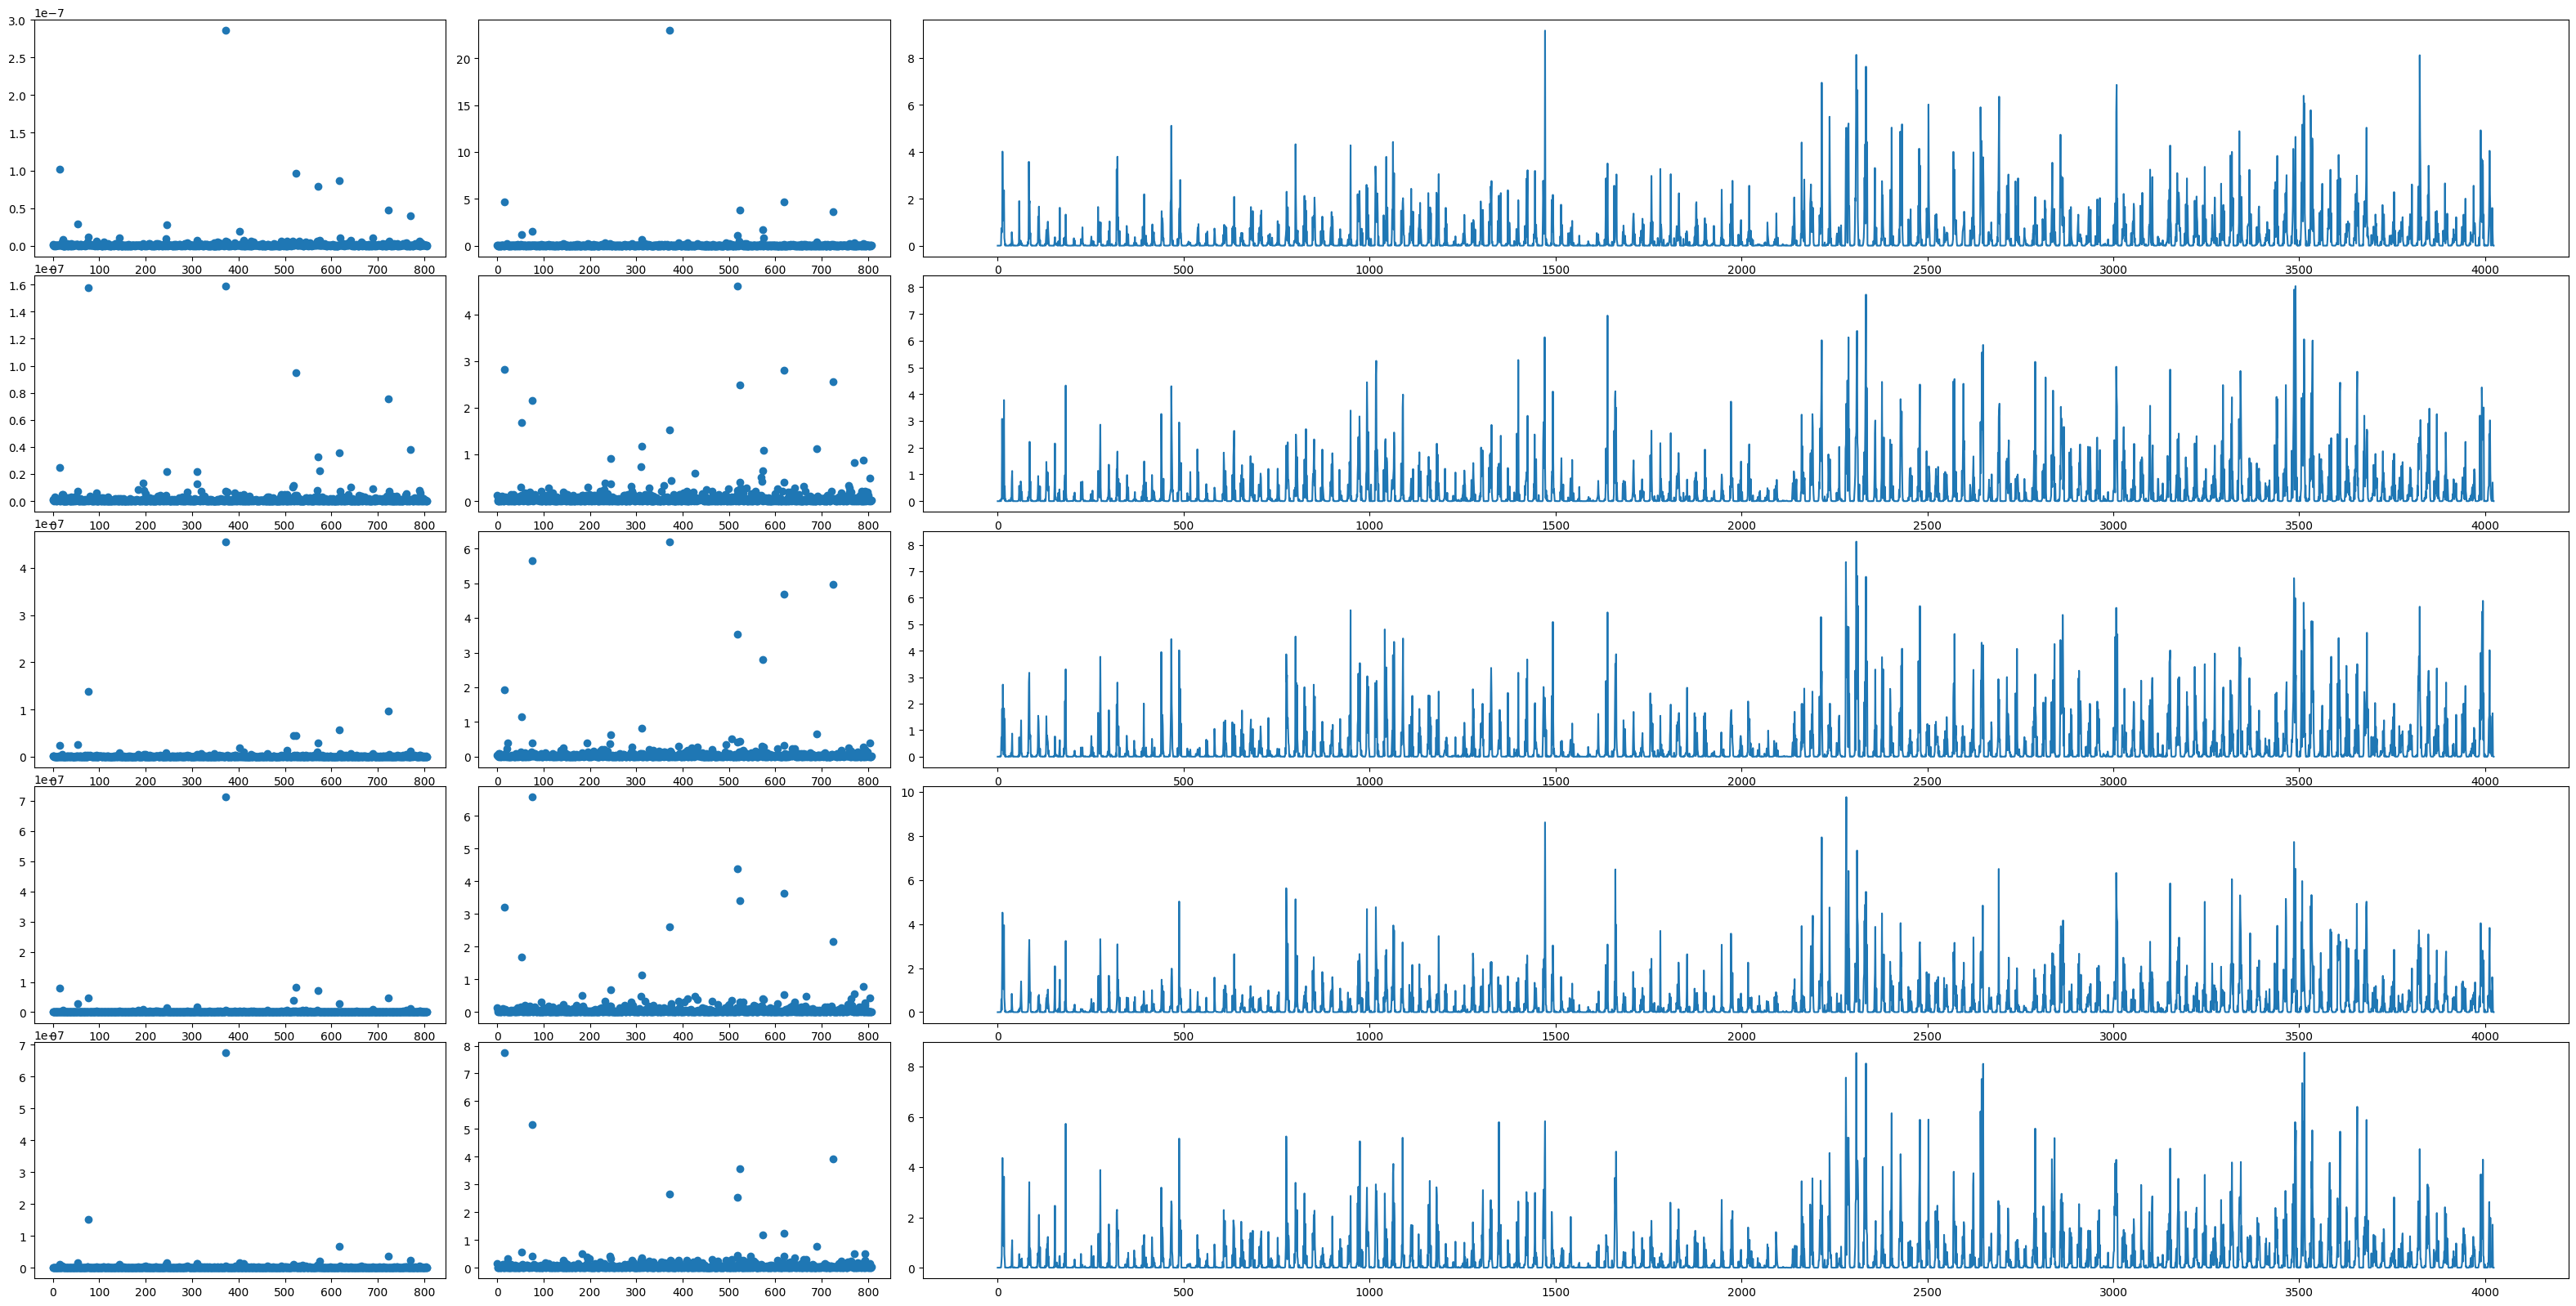

In [58]:
fig, axs = plt.subplots(5, 3, gridspec_kw={'width_ratios': [1, 1,4]})
plt.subplots_adjust(wspace=0.04, hspace=0.08)
fig.set_size_inches(40, 20)
axs[0, 0].scatter(x=s_o.iloc[:,0], y=s_o.iloc[:,1])
axs[0, 1].scatter(x=s_d.iloc[:,0], y=s_d.iloc[:,1])
axs[0, 2].plot(factors.iloc[:,1])

axs[1, 0].scatter(x=s_o.iloc[:,0], y=s_o.iloc[:,3])
axs[1, 1].scatter(x=s_d.iloc[:,0], y=s_d.iloc[:,3])
axs[1, 2].plot(factors.iloc[:,3])

axs[2, 0].scatter(x=s_o.iloc[:,0], y=s_o.iloc[:,4])
axs[2, 1].scatter(x=s_d.iloc[:,0], y=s_d.iloc[:,4])
axs[2, 2].plot(factors.iloc[:,4])

axs[3, 0].scatter(x=s_o.iloc[:,0], y=s_o.iloc[:,6])
axs[3, 1].scatter(x=s_d.iloc[:,0], y=s_d.iloc[:,6])
axs[3, 2].plot(factors.iloc[:,6])

axs[4, 0].scatter(x=s_o.iloc[:,0], y=s_o.iloc[:,7])
axs[4, 1].scatter(x=s_d.iloc[:,0], y=s_d.iloc[:,7])
axs[4, 2].plot(factors.iloc[:,7])

In [59]:
selected_ranks= [1,3,4,6,7]

In [60]:
full_sele_ranks_so = {}

rank_1_so = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_so[0] = pd.DataFrame(s_o.iloc[:,1][s_o.iloc[:,1]>0.2*1e-7].index)

rank_2_so = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_so[1] = pd.DataFrame(s_o.iloc[:,3][s_o.iloc[:,3]>0.2*1e-7].index)

rank_3_so = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_so[2] = pd.DataFrame(s_o.iloc[:,4][s_o.iloc[:,4]>0.5*1e-7].index)

rank_4_so = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_so[3] = pd.DataFrame(s_o.iloc[:,6][s_o.iloc[:,6]>0.5*1e-7].index)

rank_5_so = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_so[4] = pd.DataFrame(s_o.iloc[:,7][s_o.iloc[:,7]>1*1e-7].index)

In [61]:
full_sele_ranks_sd = {}

rank_1_sd = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_sd[0] = pd.DataFrame(s_d.iloc[:,1][s_d.iloc[:,1]>2.5].index)

rank_2_sd = pd.DataFrame(s_o.iloc[:,0])
full_sele_ranks_sd[1] = pd.DataFrame(s_d.iloc[:,3][s_d.iloc[:,3]>0.5].index)

rank_3_sd = pd.DataFrame(s_d.iloc[:,0])
full_sele_ranks_sd[2] = pd.DataFrame(s_d.iloc[:,4][s_d.iloc[:,4]>1].index)

rank_4_sd = pd.DataFrame(s_d.iloc[:,0])
full_sele_ranks_sd[3] = pd.DataFrame(s_d.iloc[:,6][s_d.iloc[:,6]>1].index)

rank_5_sd = pd.DataFrame(s_d.iloc[:,0])
full_sele_ranks_sd[4] = pd.DataFrame(s_d.iloc[:,7][s_d.iloc[:,7]>1].index)

In [62]:
full_sele_ranks_so[0][0]

0     15
1     53
2    245
3    372
4    523
5    571
6    617
7    723
8    770
Name: 0, dtype: int64

In [48]:
np.round(factors.iloc[:,selected_ranks[1]],0)[3700]

1.0

In [40]:
full_routes = pd.DataFrame()

for rank in range(5):
    new_row_list =[]
    for s_o in full_sele_ranks_so[rank][0]:
        for s_d in full_sele_ranks_sd[rank][0]:
            new_row = {'s_o':s_o,
                    's_d' : s_d
                    }
            new_row_list.append(new_row)
    routes_r1 = pd.DataFrame(new_row_list)
    routes_r1 = routes_r1[routes_r1['s_o']!=routes_r1['s_d']]
    routes_r1['nooftrips'] = np.round(factors.iloc[:,selected_ranks[rank]][3700],0) #Period 0

    full_routes = pd.concat([full_routes,routes_r1])

In [41]:
full_routes.shape[0]/(801*801)

0.0004894007334776598

In [42]:
full_routes.shape

(314, 3)

In [43]:
full_routes['nooftrips'].sum()

314.0